In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
print(train.shape)

(10000, 12)


In [4]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
#checking missing values
train.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

# Exploratory Data Analysis


### Checking data balance

In [6]:
group=train.groupby('Severity')
group.size()

Severity
Highly_Fatal_And_Damaging                  3049
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Significant_Damage_And_Serious_Injuries    2729
dtype: int64

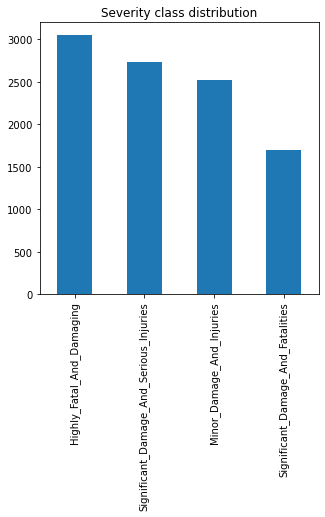

In [7]:
train["Severity"].value_counts().plot.bar(figsize=(5,5),title='Severity class distribution')

In [8]:
pd.crosstab(train['Accident_Type_Code'],train['Severity'],margins=True)

Severity,Highly_Fatal_And_Damaging,Minor_Damage_And_Injuries,Significant_Damage_And_Fatalities,Significant_Damage_And_Serious_Injuries,All
Accident_Type_Code,,,,,
1,521,231,261,158,1171
2,461,1021,168,141,1791
3,315,309,95,1033,1752
4,1178,269,399,211,2057
5,168,350,80,140,738
6,210,193,93,719,1215
7,196,154,599,327,1276
All,3049,2527,1695,2729,10000


### finding important feature 

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
y=train['Severity']
x=train.drop(['Severity'],axis=1)

In [11]:
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [12]:
important_feature=pd.Series(data=extra.feature_importances_,index=x.columns)

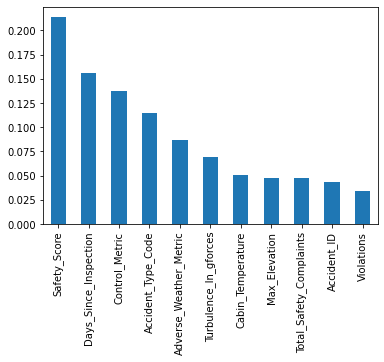

In [13]:
important_feature.sort_values(ascending=False).plot.bar()

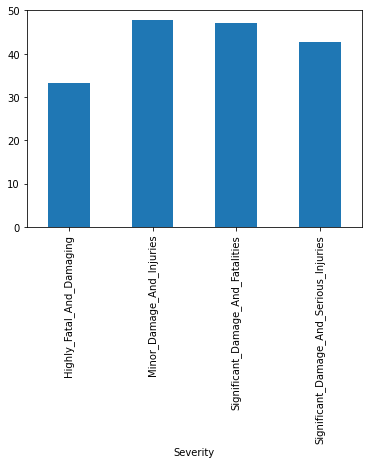

In [14]:
# relation between safety_score and severity
train.groupby('Severity')['Safety_Score'].mean().plot.bar();

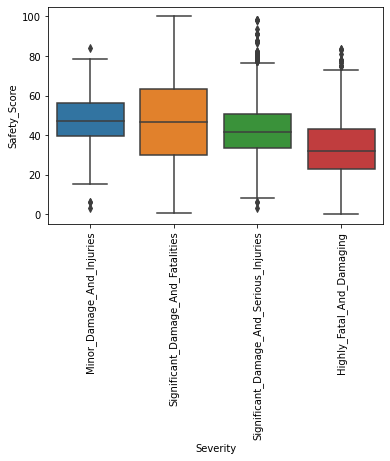

In [15]:
ax=sns.boxplot(data=train,x='Severity',y='Safety_Score')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

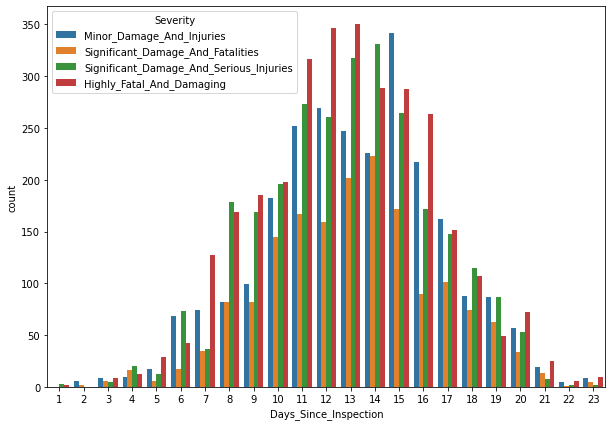

In [16]:
#Does time of  inspection affect type accident severity
plt.figure(figsize=(10,7))
sns.countplot(x=x['Days_Since_Inspection'],hue=y)

# Model Building and Implementation

In [17]:
# Droping irrelevant features and target feature
X=train.drop(['Severity','Cabin_Temperature','Max_Elevation','Total_Safety_Complaints','Accident_ID','Violations','Turbulence_In_gforces'],axis=1)
Y=train['Severity']

In [18]:
X

,Safety_Score,Days_Since_Inspection,Control_Metric,Accident_Type_Code,Adverse_Weather_Metric
0,49.223744,14,71.285324,2,0.424352
1,62.465753,10,72.288058,2,0.352350
2,63.059361,13,66.362808,7,0.003364
3,48.082192,11,74.703737,3,0.211728
4,26.484018,13,47.948952,3,0.176883
...,...,...,...,...,...
9995,56.118721,8,63.445761,5,0.026150
9996,40.365297,10,62.169553,4,0.074898
9997,27.853881,17,69.598906,3,0.168173
9998,56.210046,8,39.835916,5,0.026381


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)

In [21]:
Y

array([1, 1, 2, ..., 3, 1, 0])

### Gradient Boosting 

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [23]:
pm_grid={'learning_rate':[0.2,0.3,0.5],
           'max_depth':[5,6,7],
           'random_state':[10]
           }

In [24]:
model=GradientBoostingClassifier()

In [25]:
grid_model=GridSearchCV(estimator= model,param_grid=pm_grid,cv=5,verbose=10,n_jobs=-1)

In [26]:
grid_model.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  4.5min remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [27]:
grid_model.best_params_

{'learning_rate': 0.5, 'max_depth': 6, 'random_state': 10}

In [28]:
classifer=GradientBoostingClassifier(n_estimators=1200,learning_rate=0.5,max_depth=7,random_state=10)

In [29]:
classifer.fit(X,Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
accuracy=cross_val_score(estimator=classifer,X=X,y=Y,cv=5,scoring='f1_weighted')

In [31]:
accuracy.mean()

0.9706940479101311

# Testing model

In [32]:
test=pd.read_csv('test.csv')

In [33]:
#Checkig null values
test.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [34]:
#Droppingirrelavent features
test.drop(['Cabin_Temperature','Max_Elevation','Total_Safety_Complaints','Accident_ID','Violations','Turbulence_In_gforces'],axis=1,inplace=True)

In [36]:
predictions=classifer.predict(test)

In [39]:
predictions=encoder.inverse_transform(predictions)

In [40]:
test['Severity']=predictions

## Checking Predictions and test data on similar plots as we used on train set

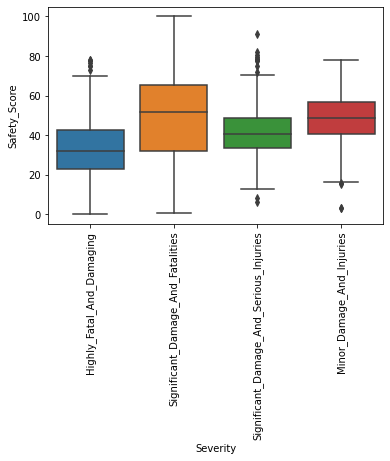

In [42]:
ax=sns.boxplot(data=test,x='Severity',y='Safety_Score')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

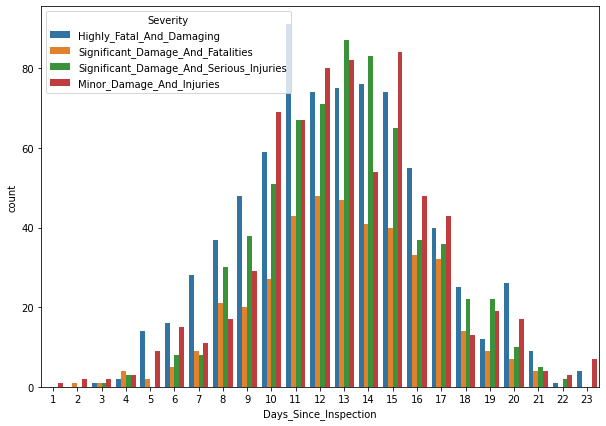

In [43]:
#Does time of  inspection affect type accident severity
plt.figure(figsize=(10,7))
sns.countplot(x=test['Days_Since_Inspection'],hue=test['Severity'])